<a href="https://colab.research.google.com/github/Prash-45/Flappy_bird-01-/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
print("Hello World")

Hello World


# Step 1: Install and access the dataset

In [69]:
#Installing Kaggle
!pip install Kaggle --quiet

In [70]:
#Upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"prashant017","key":"74bc2209ffee86ec7cb141e181ba2f8c"}'}

In [71]:
#Creating a kaggle directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [72]:
#Copy Kaggle.json file
!cp kaggle.json ~/.kaggle/

In [73]:
#to check
!ls -ltr ~/.kaggle/

total 4
-rw------- 1 root root 67 Feb 28 12:53 kaggle.json


In [74]:
#to change the above folder into read and write mode
!chmod 600 ~/.kaggle/kaggle.json

In [75]:
#Checking of your required dataset
!kaggle datasets list -s 'Titanic-Dataset.csv'

ref                                                             title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yasserh/titanic-dataset                                         Titanic Dataset                                        22564  2021-12-24 14:53:06.913000         285595        876  1.0              
sakshisatre/titanic-dataset                                     Titanic Dataset                                        60609  2024-04-30 19:20:37.987000           8074         85  1.0              
lovishbansal123/titanic-dataset                                 Titanic Dataset                                        22564  2024-02-16 13:53:32.563000            762         39  1.0              
snehiljain

In [76]:
#downloading required kaggle dataset
!kaggle datasets download -d 'yasserh/titanic-dataset' -p ../data/KaggleDataSetForTitanic

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
#just checking is dataset is into the required position after saving it in  required position
!ls -ltr ../data/KaggleDataSetForTitanic

total 84
-rwxrwxrwx 1 root root 61194 Dec 24  2021 Titanic-Dataset.csv
-rw-r--r-- 1 root root 22564 Dec 24  2021 titanic-dataset.zip


In [78]:
#Unzipping the above dataset
!unzip ../data/KaggleDataSetForTitanic/titanic-dataset.zip -d ../data/KaggleDataSetForTitanic

Archive:  ../data/KaggleDataSetForTitanic/titanic-dataset.zip
replace ../data/KaggleDataSetForTitanic/Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [79]:
#giving the proper permission to the unzipped file
!chmod 777 ../data/KaggleDataSetForTitanic/Titanic-Dataset.csv

# Step 2: Data analysis using Panel data

In [80]:
#Now performing the simple operations on a dataset
import pandas as pd
df = pd.read_csv('../data/KaggleDataSetForTitanic/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
#tells about (rows*columns)
df.shape

(891, 12)

In [82]:
#basic overview of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
#columns used in a dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
#types of data used in a datset
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [85]:
#basic info about a dataset (return non null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#return total number of null values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [87]:
#Survival rate
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [88]:
#printing all the required dataset
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [89]:
#locating the data inside the dataset
P_Id = int(input("Enter the passenger ID : "))
print(df.loc[df['PassengerId'] == P_Id])

Enter the passenger ID : 675
     PassengerId  Survived  Pclass                        Name   Sex  Age  \
674          675         0       2  Watson, Mr. Ennis Hastings  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
674      0      0  239856   0.0   NaN        S  


In [90]:
#printing the name of all members in a datset
print(df[['Name','Ticket','Survived']])

                                                  Name            Ticket  \
0                              Braund, Mr. Owen Harris         A/5 21171   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599   
2                               Heikkinen, Miss. Laina  STON/O2. 3101282   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)            113803   
4                             Allen, Mr. William Henry            373450   
..                                                 ...               ...   
886                              Montvila, Rev. Juozas            211536   
887                       Graham, Miss. Margaret Edith            112053   
888           Johnston, Miss. Catherine Helen "Carrie"        W./C. 6607   
889                              Behr, Mr. Karl Howell            111369   
890                                Dooley, Mr. Patrick            370376   

     Survived  
0           0  
1           1  
2           1  
3           1  
4      

In [91]:
#getting to know about survival dataset
survived_members = df.loc[df['Survived'] == 1]
# print(survived_members)
print(survived_members[['Name','Ticket']])

                                                  Name            Ticket
1    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599
2                               Heikkinen, Miss. Laina  STON/O2. 3101282
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)            113803
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)            347742
9                  Nasser, Mrs. Nicholas (Adele Achem)            237736
..                                                 ...               ...
875                   Najib, Miss. Adele Kiamie "Jane"              2667
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)             11767
880       Shelley, Mrs. William (Imanita Parrish Hall)            230433
887                       Graham, Miss. Margaret Edith            112053
889                              Behr, Mr. Karl Howell            111369

[342 rows x 2 columns]


In [92]:
#using group_by() fxn :
ticket_class= df.groupby(['Pclass'])
print(ticket_class.count())                  #count function ignores NaN variables

        PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               216       216   216  216  186    216    216     216   216   
2               184       184   184  184  173    184    184     184   184   
3               491       491   491  491  355    491    491     491   491   

        Cabin  Embarked  
Pclass                   
1         176       214  
2          16       184  
3          12       491  


In [93]:
#mean according to Pclass
print(ticket_class.mean(numeric_only=True))

        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550


In [94]:
#using sum fxn
print(ticket_class.sum(numeric_only=True))

        PassengerId  Survived      Age  SibSp  Parch        Fare
Pclass                                                          
1             99705       136  7111.42     90     77  18177.4125
2             82056        87  5168.83     74     70   3801.8417
3            215625       119  8924.92    302    193   6714.6951


In [95]:
class_one_members = df[df['Pclass'] == 1]
print(class_one_members[['Name','Ticket']])

                                                  Name    Ticket
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  PC 17599
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    113803
6                              McCarthy, Mr. Timothy J     17463
11                            Bonnell, Miss. Elizabeth    113783
23                        Sloper, Mr. William Thompson    113788
..                                                 ...       ...
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)     11751
872                           Carlsson, Mr. Frans Olof       695
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)     11767
887                       Graham, Miss. Margaret Edith    112053
889                              Behr, Mr. Karl Howell    111369

[216 rows x 2 columns]


In [96]:
print(df['Cabin'].to_string())


0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [97]:
# Dropping unnecessary columns
df = df.drop(columns=["Embarked"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


In [98]:
# Handle missing data
# df = df.dropna(subset=["Cabin"])
# df.head()

In [99]:
#Fixing inconsiistent values
df['Sex'] = df["Sex"].replace({"female":0})
df['Sex'] = df["Sex"].replace({"male":1})
df.head()

/tmp/ipython-input-188/1350828398.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df["Sex"].replace({"male":1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN


In [100]:
#Number of male_members onboarding ship
male_members = df[df['Sex'] == 1]
print(male_members[['Name','Ticket']])

                               Name            Ticket
0           Braund, Mr. Owen Harris         A/5 21171
4          Allen, Mr. William Henry            373450
5                  Moran, Mr. James            330877
6           McCarthy, Mr. Timothy J             17463
7    Palsson, Master. Gosta Leonard            349909
..                              ...               ...
883   Banfield, Mr. Frederick James  C.A./SOTON 34068
884          Sutehall, Mr. Henry Jr   SOTON/OQ 392076
886           Montvila, Rev. Juozas            211536
889           Behr, Mr. Karl Howell            111369
890             Dooley, Mr. Patrick            370376

[577 rows x 2 columns]


In [101]:
#Survival rate
df["Sex"].value_counts()

,count
Sex,
1,577
0,314


In [102]:
#Brief overview of data
df["Age"].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [103]:
#counts total number of people in very sect
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [104]:
#changes the dataype from float to int
df = df.astype({
                "Survived": "float64",
                "Pclass": "float64",
                "SibSp": "float64",
                "Parch": "float64"})

In [105]:
#reveales the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 76.7+ KB


In [106]:
#forms the correlation matrix(just tell the relativity with each column in each row)
numerical_features = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_features].corr()

print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [107]:
#getting the info how many ones survived on the basis of gender
df.groupby("Sex")["Survived"].value_counts()

Sex  Survived
0    1.0         233
     0.0          81
1    0.0         468
     1.0         109
Name: count, dtype: int64

In [108]:
#Value close to 1 : more survived
#Value close to 0 : more died
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [109]:
#getting the info how many ones survived from each class
df.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64

# Step 3: Data Analysis using Matplotlib

In [110]:
pip install seaborn

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

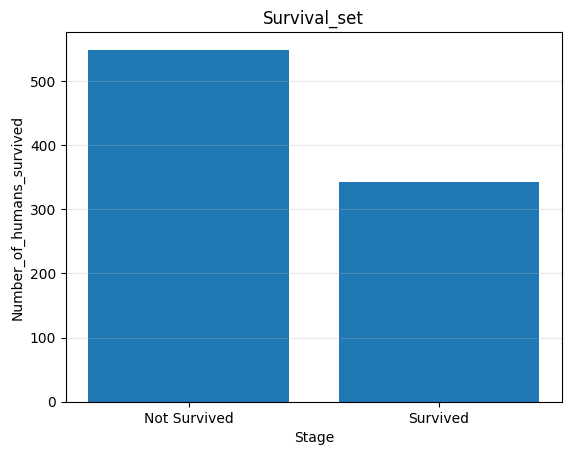

In [112]:
#Survivance_Visualization
plt.bar(['Not Survived', 'Survived'], df['Survived'].value_counts())
plt.xlabel('Stage')
plt.ylabel('Number_of_humans_survived')
plt.title('Survival_set')
plt.grid(True, alpha=0.3, axis='y')  # Only horizontal grid lines
plt.show()

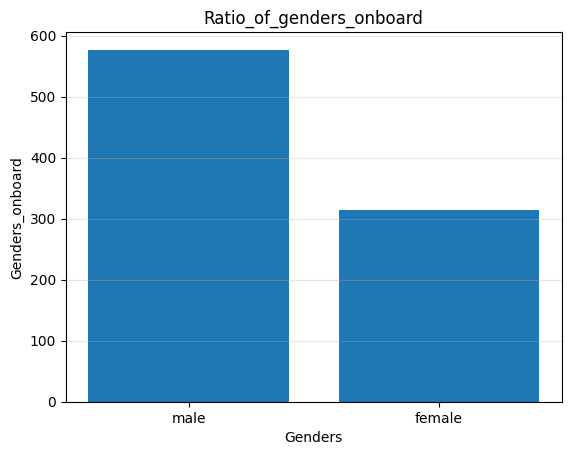

In [113]:
#Male and Female abroad
plt.bar(['male','female'], df["Sex"].value_counts())
plt.xlabel('Genders')
plt.ylabel('Genders_onboard')
plt.title('Ratio_of_genders_onboard')
plt.grid(True, alpha=0.3, axis='y')  # Only horizontal grid lines
plt.show()

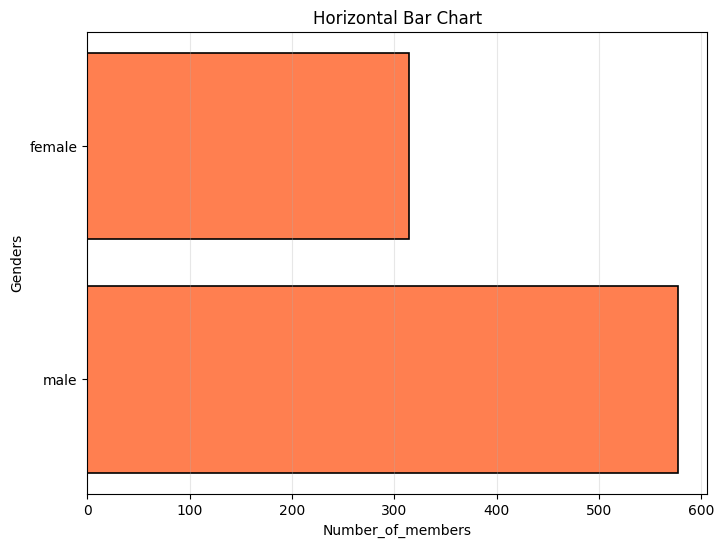

In [114]:
#Just horizonatal representataion
plt.figure(figsize=(8, 6))
plt.barh(['male','female'], df["Sex"].value_counts(), color='coral', edgecolor='black', linewidth=1.2)
plt.xlabel('Number_of_members')
plt.ylabel('Genders')
plt.title('Horizontal Bar Chart')
plt.grid(True, alpha=0.3, axis='x')
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

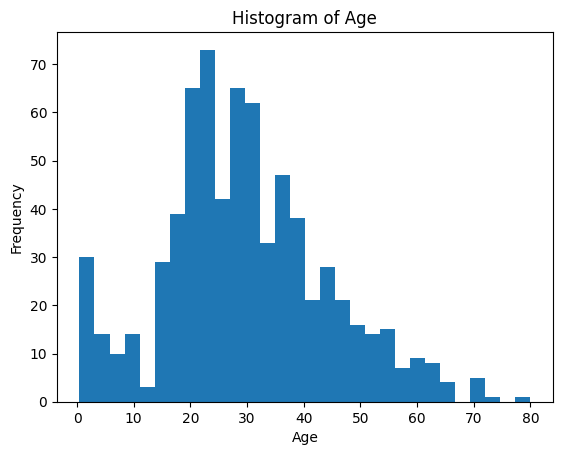

In [115]:
#People_by_age
plt.hist(df['Age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

<Axes: xlabel='Sex'>

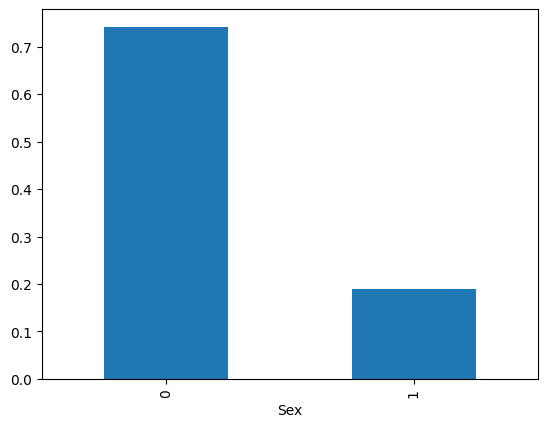

In [116]:
#Survivability_by_a_gender
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

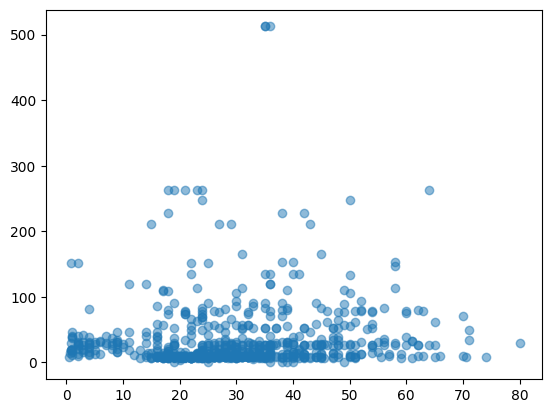

In [117]:
#Age v/s Fare
plt.scatter(df['Age'], df['Fare'], alpha=0.5)

<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

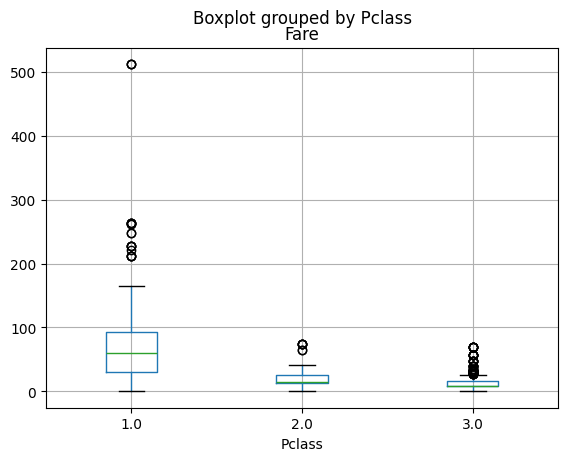

In [118]:
#Boxplot (Fare by Class)
df.boxplot(column='Fare', by='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

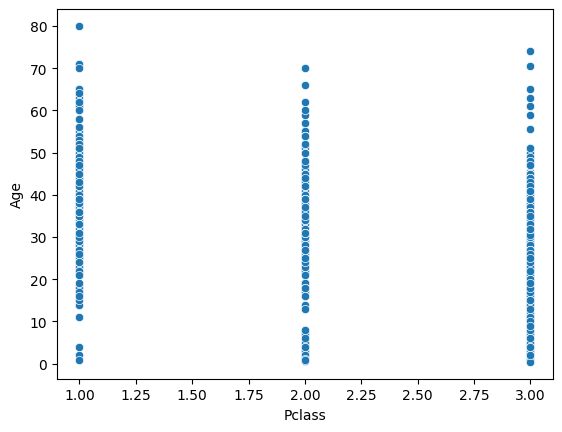

In [119]:
#sctterplot(class by age)
sns.scatterplot(df,x="Pclass",y="Age")

<Axes: xlabel='Pclass', ylabel='Age'>

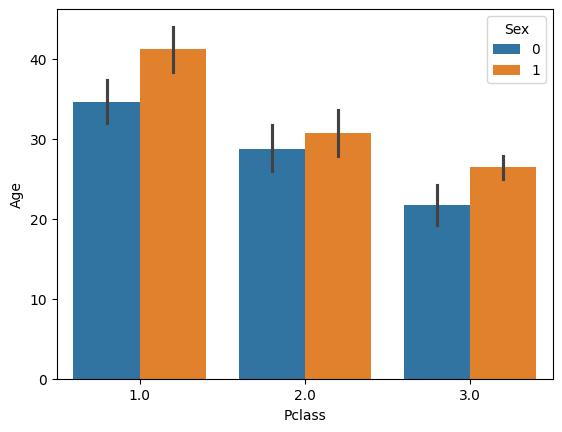

In [120]:
#barplot(age by gender in each class)
sns.barplot(df,x="Pclass",y="Age",hue="Sex")

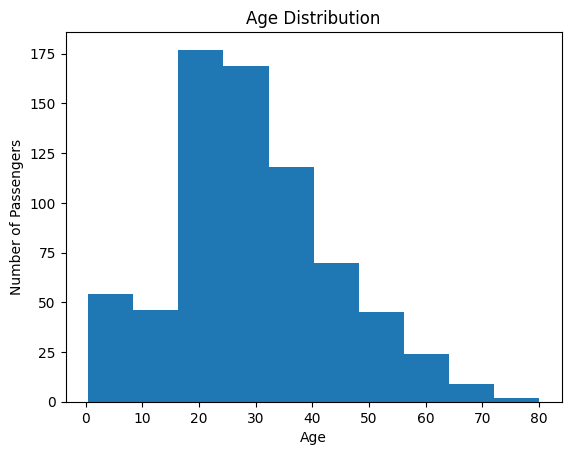

In [121]:
#draw hist age distrivbution by number of passengers
plt.hist(df["Age"].dropna())
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution")
plt.show()

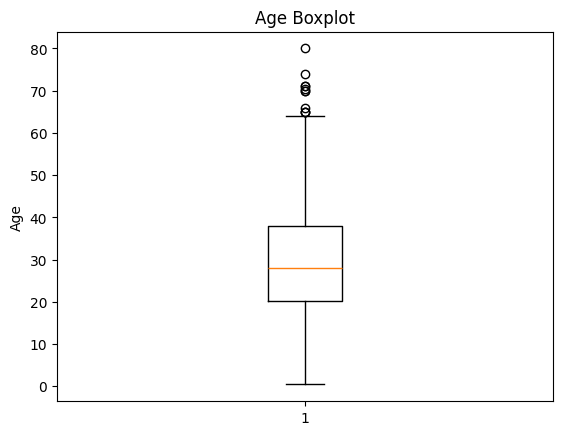

In [122]:
#Age boxplot for each member
plt.boxplot(df["Age"].dropna())
plt.title("Age Boxplot")
plt.ylabel("Age")
plt.show()

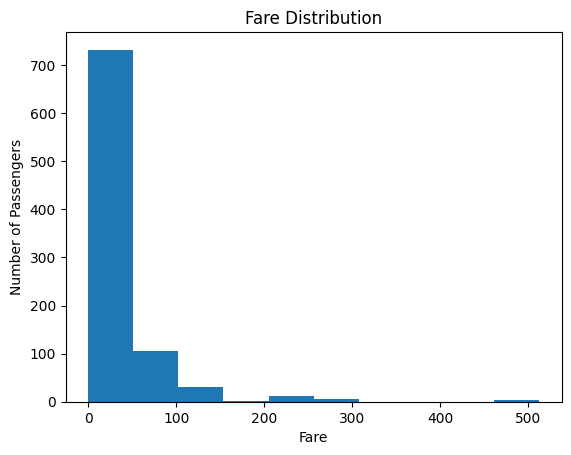

In [123]:
plt.hist(df["Fare"])
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution")
plt.show()

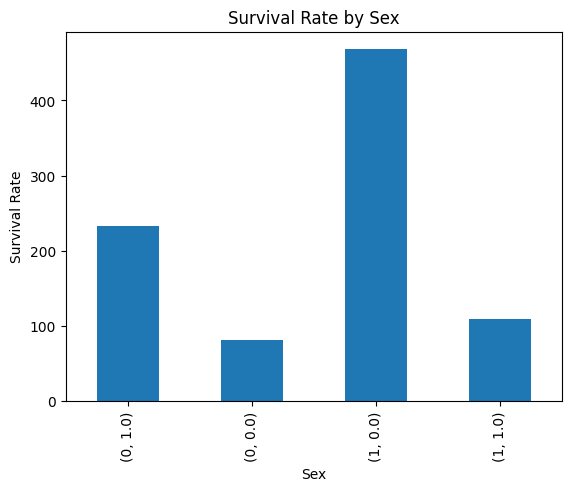

In [124]:
df.groupby("Sex")["Survived"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()

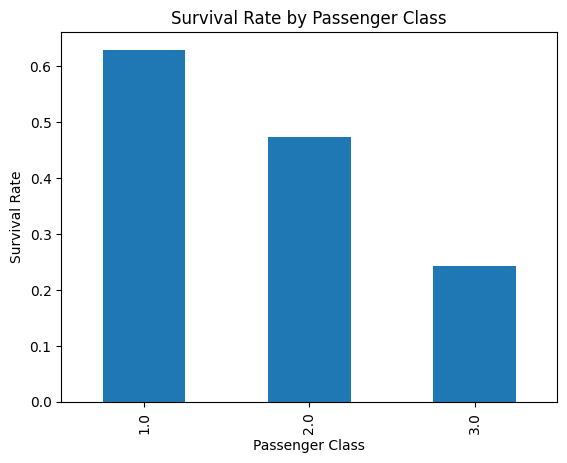

In [125]:
df.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()

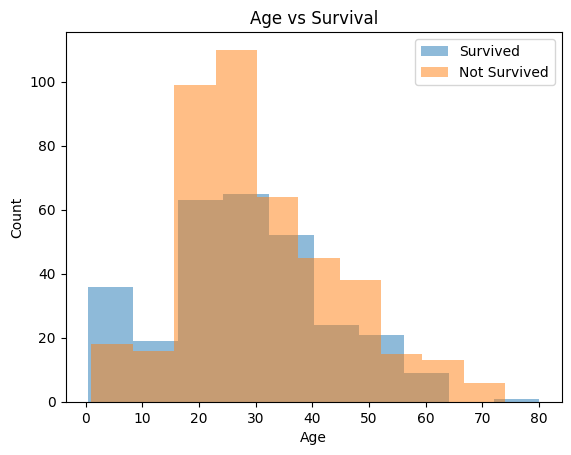

In [126]:
#survival by age
survived = df[df["Survived"] == 1]["Age"]
not_survived = df[df["Survived"] == 0]["Age"]
plt.hist(survived.dropna(), alpha=0.5, label="Survived")
plt.hist(not_survived.dropna(), alpha=0.5, label="Not Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs Survival")
plt.legend()
plt.show()

#Step 4: Data Preparation steps before training the model

In [127]:
# Drop Unnecessary Columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [128]:
#Handle Missing Values
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [129]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


Converting categorical variables into numbers

In [130]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [131]:
df.dtypes

,0
Survived,float64
Pclass,float64
Sex,int64
Age,float64
SibSp,float64
Parch,float64
Fare,float64


In [132]:
#Separate Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [133]:
X = (X - X.mean()) / X.std()

In [134]:
X.shape, y.shape

((891, 6), (891,))